In [1]:
import numpy as np
from scipy.interpolate import LSQBivariateSpline

import matplotlib.pyplot as plt
from astropy.modeling import models
import astropy.units as u
from astropy.io import fits
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)

from specreduce.utils.synth_data import make_2d_arc_image

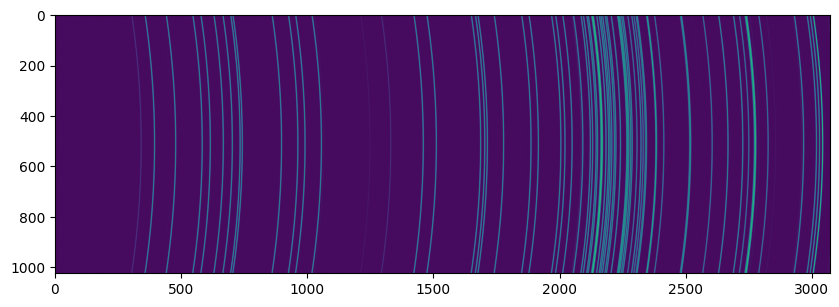

In [32]:
model_deg2 = models.Legendre1D(degree=2, c0=50, c1=0, c2=100)
im = make_2d_arc_image(
    nx=3072,
    ny=1024,
    linelists=['HeI', 'ArI'],
    line_fwhm=3,
    tilt_func=model_deg2,
    amplitude_scale=0.1,
    background=100
)
fig = plt.figure(figsize=(10, 6))
plt.imshow(im.data)

In [44]:
y, x = np.indices(im.shape)
ysize, xsize = im.shape
noise = np.sqrt(im)
weights = 1 / noise
xknots = np.linspace(0, xsize, int(xsize))
yknots = np.linspace(0, ysize, int(ysize/10))
spline_fit = LSQBivariateSpline(
    x.ravel(), y.ravel(), im.data.ravel(), xknots, yknots, w=weights.ravel(), kx=1, ky=3
)

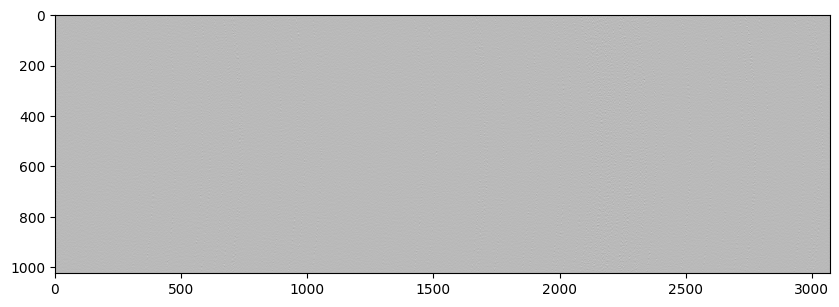

In [45]:
fig = plt.figure(figsize=(10, 6))
zinterp = np.transpose(spline_fit(np.arange(0, xsize), np.arange(0, ysize)))
norm = ImageNormalize(im.data - zinterp, interval=ZScaleInterval(contrast=0.0005), stretch=SqrtStretch())
plt.imshow(im.data - zinterp, cmap='gray', norm=norm)

In [46]:
fits.writeto("blah.fits", im.data-zinterp, overwrite=True)

In [119]:
fits.writeto("interp.fits", zinterp, overwrite=True)